In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train_income = app_train['AMT_INCOME_TOTAL']
print(app_train_income.describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


### Create DataFrame

In [6]:
app_train_income_df = pd.DataFrame({'Income': app_train_income}, columns = ['Income'])
app_train_income_df.head()

,Income
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0


### Plot scatter and check outlier

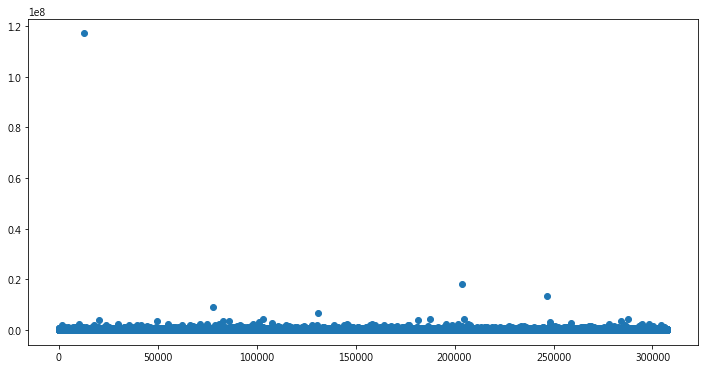

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12.0, 6.0)
plt.scatter(x=app_train_income_df.index, y=app_train_income_df['Income'])  #check outlier

### Remove outlier and plot hist

In [18]:
# remove outlier
drop_index = app_train_income_df[app_train_income_df["Income"] > 1000000].index
print("drop_index:", drop_index)
print("len(drop_index):", len(drop_index))

drop_index: Int64Index([  1504,   1723,   3371,   4603,   7061,   8314,  10222,  11068,
             11344,  12005,
            ...
            294589, 294892, 296216, 296626, 297755, 298082, 300468, 304477,
            305577, 306028],
           dtype='int64', length=250)
len(drop_index): 250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BCF5476A0>]],
      dtype=object)

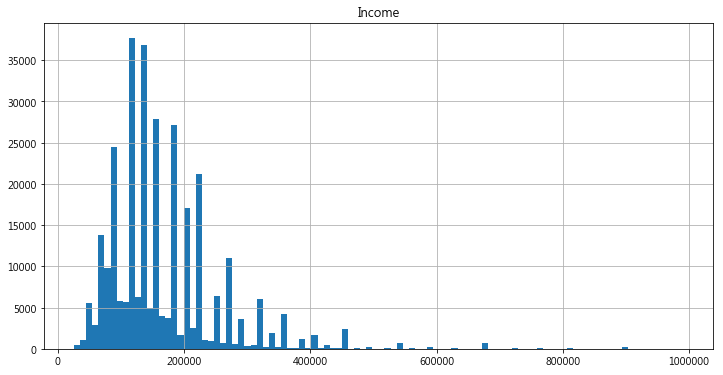

In [16]:
temp_df = app_train_income_df.drop(drop_index)
temp_df.hist(bins=100)